<b> 소융대 ICT 데이터 불러오기 </b>

In [45]:
import pandas as pd

file_path = "C:/ie/2022_2학기_중앙감사_ICT융합학부.xlsx - 결산안.csv"
ict = pd.read_csv(file_path, skiprows=2)

ict.fillna(0, inplace=True)

ict.columns = ['','날짜', '내용', '수입', '지출', '잔액', '잔액_2', '세부항목']  # Change the second '잔액' column name to '잔액_2'

ict = ict.drop(['', '잔액_2'], axis=1)  # Drop the unnecessary and duplicate columns

ict.drop(0, inplace=True)

# remove the ₩ symbol and convert numbers to integer
ict['잔액'] = pd.to_numeric(ict['잔액'].astype(str).str.replace('₩', '').str.replace(',', ''), errors='coerce').astype('Int64')
ict['수입'] = pd.to_numeric(ict['수입'].astype(str).str.replace('₩', '').str.replace(',', ''), errors='coerce').astype('Int64')
ict['지출'] = pd.to_numeric(ict['지출'].astype(str).str.replace('₩', '').str.replace(',', ''), errors='coerce').astype('Int64')

print(ict)


            날짜           내용      수입      지출        잔액  \
1   2022-06-23           쿠팡       0   99750  14916900   
2   2022-06-23           쿠팡       0  159680  14757220   
3   2022-06-23           쿠팡       0  158860  14598360   
4   2022-06-23           쿠팡       0    8500  14589860   
5   2022-06-23           쿠팡       0  186360  14403500   
..         ...          ...     ...     ...       ...   
79  2022-12-17  09.17~12.16    1142       0   4089660   
80  2022-12-19           쿠팡       0  337020   3752640   
81  2022-12-21   윤채은(칠성포차한양       0  761500   2991140   
82  2022-12-29            0  245000       0   3236140   
83  2022-12-31      카카오_선물하       0   35000   3201140   

                                                 세부항목  
1   [과MT_물품 구매]\n코리아보드게임즈 폭탄돌리기, 혼합 색상 (18,740원 * ...  
2   [과MT_물품 구매]\n홈플래닛 고급형 알루미늄 노트북 거치대(쿨링홀 + 높이각도 ...  
3   [과MT_물품 구매]\n옹달샘 세미나 명찰 세로형 95 x 122 mm, 회색, 3...  
4   [과MT_물품 구매]\n개인용 슬라이딩 페이퍼 사진 커터기, A4, 단일 상품(블랙...  
5   [과MT_물품 구매]\n롯데이라이프 친환경 일회용접시, 

<b> 소융대 ICT 2022-2학기 학생회비

In [46]:
first_balance = ict.loc[1, '잔액']
max_balance = ict['잔액'].max()  # '잔액' 열에서 최댓값 찾기
print(first_balance,'원')
print(max_balance,'원')

14916900 원
14916900 원


<b> 소융대 ICT 월별총지출

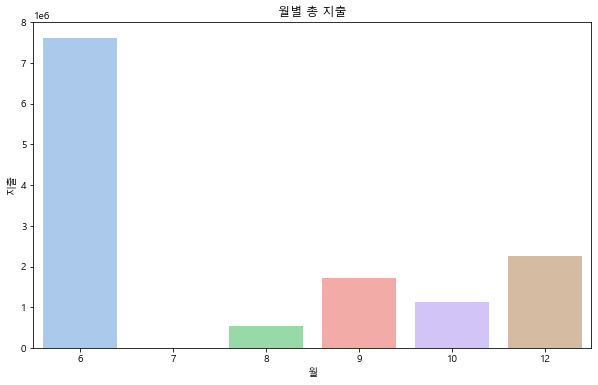

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

# Set font properties for Korean
font_location = 'C:/Windows/Fonts/malgun.ttf'  # For Windows
font_name = fm.FontProperties(fname=font_location).get_name()
plt.rcParams['font.family'] = font_name

# Convert the '날짜' column to datetime format
ict['날짜'] = pd.to_datetime(ict['날짜'])

# Extract the month from the '날짜' column and create a new '월' column
ict['월'] = ict['날짜'].dt.month

# Group the data by month and sum the '지출' column
monthly_expenses = ict.groupby('월')['지출'].sum().reset_index()

# Set the color palette to pastel
sns.set_palette("pastel")

# Create a bar plot of the total expenses per month
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='월', y='지출', data=monthly_expenses)
ax.set(xlabel='월', ylabel='지출', title='월별 총 지출')
plt.show()


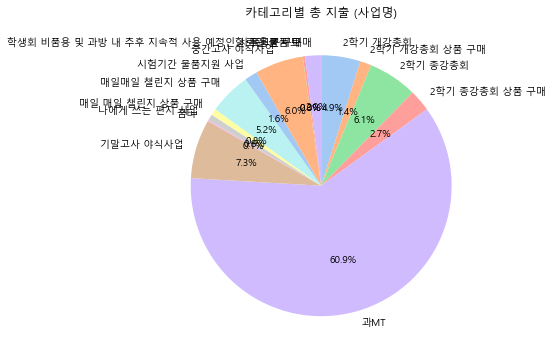

In [44]:
# Extract the category name from the '사업' column and create a new '사업명' column
ict['사업명'] = ict['사업'].str.split('_').str[0]

# Calculate the total spending for each category name
category_name_spending = ict.groupby('사업명')['지출'].sum()

# Create a pie chart of the spending for each category name
fig, ax = plt.subplots(figsize=(10, 6))
category_name_spending.plot.pie(autopct='%1.1f%%', startangle=90, counterclock=False, ax=ax)
ax.set_title('카테고리별 총 지출 (사업명)')
ax.set_ylabel('')

plt.show()


<b> ICT에서 가장 많았던 사업 TOP 10

In [43]:
# Sort the DataFrame by the '지출' column in descending order
sorted_ict = ict[ict['사업'] != '학생회비 이전'].sort_values('지출', ascending=False)

# Display the top 10 items with the highest spending excluding '학생회비 이전' and any rows with '환불' in the '세부항목' column
top_spending_items = sorted_ict[~sorted_ict['세부항목'].str.contains('환불') & (sorted_ict['사업'] != '학생회비 이전')].head(10)
top_spending_items


,날짜,내용,수입,지출,잔액,세부항목,월,사업
15,2022-06-25,전창한,0,2500000,9811690,"[과MT_버스 대절]\n(주)그린코리아관광\n45인승버스 (700,000원 * 3대...",6,과MT_버스 대절
9,2022-06-24,쿠팡,0,1187480,12657490,"[과MT_물품 구매]\n곰곰 바지락 술찜 (냉동), 450g, 2개입 (12,590...",6,과MT_물품 구매
19,2022-06-25,김광희,0,1000000,7536250,"[과MT_숙소 숙박비]\n[대성랜드]\n(2022-05-09에 선입금한 300,00...",6,과MT_숙소 숙박비
17,2022-06-25,장원유통(주),0,777700,8553990,[과MT_물품 구매]\n[장원식자재마트]\n참이슬후레쉬지함 360ml 20입 (31...,6,과MT_물품 구매
81,2022-12-21,윤채은(칠성포차한양,0,761500,2991140,"[2학기 종강총회_카드결제]\n통삼겹두루치기 (18,000원 * 7개)\n돈서방김치...",12,2학기 종강총회_카드결제
63,2022-10-17,팔칠달강정 한,0,650000,5336278,"[중간고사 야식사업]\n[87닭강정] 87오리지널(中: 아쉬운 2인분) (13,00...",10,중간고사 야식사업
74,2022-12-09,듬박이찌개(안,0,600000,4255548,[기말고사 야식사업]\n[듬박이 김치찌개 안산한대점] \n매운 김치갈비찜 메 (23...,12,기말고사 야식사업
6,2022-06-23,쿠팡,0,485330,13918170,"[과MT_물품 구매]\n오뚜기 맛있는 오뚜기밥, 210g, 36개 (32,190원 ...",6,과MT_물품 구매
16,2022-06-25,김연태,0,480000,9331690,"[과MT_물품 구매]\n삼겹살(오스트리아)907012900003 (10,000원 *...",6,과MT_물품 구매
80,2022-12-19,쿠팡,0,337020,3752640,"[2학기 종강총회 상품 구매]\n해피데이 포켓형 대용량 핫팩 150g, 50개 (2...",12,2학기 종강총회 상품 구매


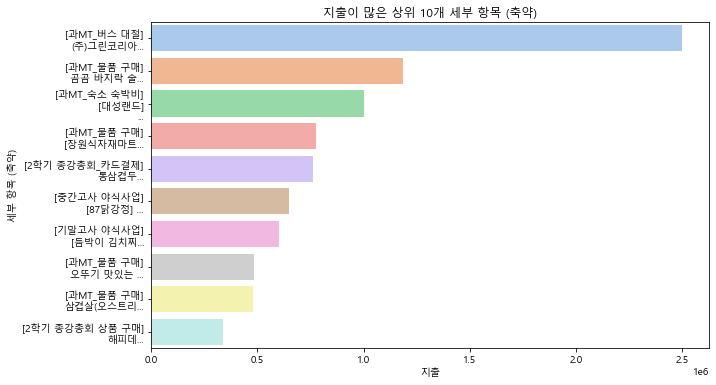

,날짜,세부 항목 (축약),지출
1,2022-06-25,[과MT_버스 대절]\n(주)그린코리아...,2500000
2,2022-06-24,[과MT_물품 구매]\n곰곰 바지락 술...,1187480
3,2022-06-25,[과MT_숙소 숙박비]\n[대성랜드]\n...,1000000
4,2022-06-25,[과MT_물품 구매]\n[장원식자재마트...,777700
5,2022-12-21,[2학기 종강총회_카드결제]\n통삼겹두...,761500
6,2022-10-17,[중간고사 야식사업]\n[87닭강정] ...,650000
7,2022-12-09,[기말고사 야식사업]\n[듬박이 김치찌...,600000
8,2022-06-23,[과MT_물품 구매]\n오뚜기 맛있는 ...,485330
9,2022-06-25,[과MT_물품 구매]\n삼겹살(오스트리...,480000
10,2022-12-19,[2학기 종강총회 상품 구매]\n해피데...,337020


In [42]:
# Truncate the '세부항목' column to a maximum of 20 characters
top10_expenses['세부항목_축약'] = top10_expenses['세부항목'].str.slice(0, 20) + "..."

# Create a bar plot of the top 10 expenses by '세부항목_축약'
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='지출', y='세부항목_축약', data=top10_expenses)
ax.set(xlabel='지출', ylabel='세부 항목 (축약)', title='지출이 많은 상위 10개 세부 항목 (축약)')
plt.show()

# Display the top 10 expenses as a table
top10_expenses_table = top10_expenses[['날짜', '세부항목_축약', '지출']].reset_index(drop=True)
top10_expenses_table.index += 1
top10_expenses_table.columns = ['날짜', '세부 항목 (축약)', '지출']
top10_expenses_table
